CDF (Cumulative Distribution Function) описує ймовірність того, що випадкова величина X не перевищує певного значення x

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Генеруємо дані
data = np.random.normal(loc=50, scale=10, size=1000)

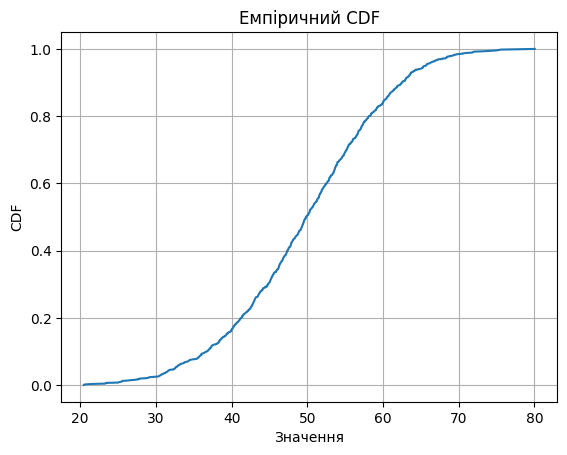

In [5]:
# Сортуємо дані
sorted_data = np.sort(data)
# Накопичена ймовірність
cdf = np.arange(1, len(sorted_data)+1) / len(sorted_data)

plt.plot(sorted_data, cdf)
plt.xlabel('Значення')
plt.ylabel('CDF')
plt.title('Емпіричний CDF')
plt.grid(True)
plt.show()


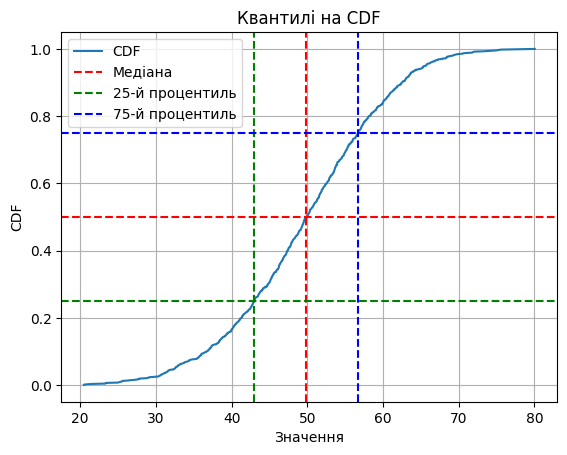

In [6]:
median = np.percentile(data, 50)
q25 = np.percentile(data, 25)
q75 = np.percentile(data, 75)

plt.plot(sorted_data, cdf, label='CDF')
plt.axhline(0.5, color='red', linestyle='--', label='Медіана')
plt.axvline(median, color='red', linestyle='--')
plt.axhline(0.25, color='green', linestyle='--', label='25-й процентиль')
plt.axvline(q25, color='green', linestyle='--')
plt.axhline(0.75, color='blue', linestyle='--', label='75-й процентиль')
plt.axvline(q75, color='blue', linestyle='--')

plt.xlabel('Значення')
plt.ylabel('CDF')
plt.title('Квантилі на CDF')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np

# Припустимо, що температура в кімнаті (°C) приблизно нормально розподілена
# Середнє 22°C, стандартне відхилення 2°C
def temperature_probability(a, b, mu=22, sigma=2, num_points=1000):
    """
    Обчислює ймовірність, що температура буде в діапазоні [a,b].
    
    Параметри:
    a, b - межі діапазону
    mu - середнє значення температури
    sigma - стандартне відхилення
    num_points - кількість точок для чисельного інтегрування
    """
    # Побудова сітки значень
    x = np.linspace(mu - 5*sigma, mu + 5*sigma, num_points)
    dx = x[1] - x[0]
    
    # PDF нормального розподілу
    pdf = (1/(sigma * np.sqrt(2*np.pi))) * np.exp(-0.5 * ((x - mu)/sigma)**2)
    
    # Чисельна CDF
    cdf = np.cumsum(pdf) * dx
    
    # Знаходимо індекси для a і b
    i_a = np.searchsorted(x, a)
    i_b = np.searchsorted(x, b)
    
    # Ймовірність потрапити в [a,b]
    return cdf[i_b] - cdf[i_a]

# Приклад: ймовірність, що температура між 20°C і 24°C
prob = temperature_probability(20, 24)
print(f"Ймовірність, що температура буде між 20°C і 24°C ≈ {prob:.4f}")

Ймовірність, що температура буде між 20°C і 24°C ≈ 0.6832
